In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import skimage.transform as tf

%matplotlib inline

In [3]:
###########测试
f = h5py.File('datasets/train_catvnoncat.h5' , 'r')
print(f)    #!!直接对文件进行打印会输出文件类型，文件名和打开类型

<HDF5 file "train_catvnoncat.h5" (mode r)>


In [4]:
def load_dataset():        
    train_dataset = h5py.File("datasets/train_catvnoncat.h5", "r") 
    train_value_orig = np.array(train_dataset["train_set_x"][:]) 
    train_label_orig = np.array(train_dataset["train_set_y"][:]) 

    
    test_dataset = h5py.File("datasets/test_catvnoncat.h5", "r") 
    test_value_orig = np.array(test_dataset["test_set_x"][:]) 
    test_label_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_label_orig = train_label_orig.reshape((1, train_label_orig.shape[0]))
    test_label_orig = test_label_orig.reshape((1, test_label_orig.shape[0]))
    
   
    return train_value_orig, train_label_orig, test_value_orig, test_label_orig, classes

In [5]:
train_set_value, train_set_label, test_set_value, test_set_label, classes = load_dataset()

In [6]:
##########测试
a = test_set_label.shape      #直接调用shape显示整体的维度
b = test_set_label.shape[0]   #加[]显示指定维的维度，针对多维数组
print(a)
print(b)


#直接调用shape显示整体的维度

(1, 50)
1


In [7]:
##########测试
a = train_set_label
b = train_set_label[0]
#c = train_set_label[30]    会出错train_set_label没有30个维度
d = train_set_label[:10]
e = train_set_label[:,30]
print(a ,'\n' , b , '\n',d,'\n',e)

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]] 
 [0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0] 
 [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0

In [8]:
########测试
print(train_set_label[:,30])
print(np.squeeze(train_set_label[:,30]))
print(classes[np.squeeze(train_set_label[:,30])])
print(classes[np.squeeze(train_set_label[:,30])].decode("utf-8"))

[0]
0
b'non-cat'
non-cat


In [9]:
train_set_label[:, 30]


array([0], dtype=int64)

In [10]:
str(train_set_label[:, 30])

'[0]'

In [11]:
print ("标签为" + str(train_set_label[:,30]))
print ("标签为" ,(train_set_label[:, 30]))

标签为[0]
标签为 [0]


标签为[0]，这是一个non-cat图片


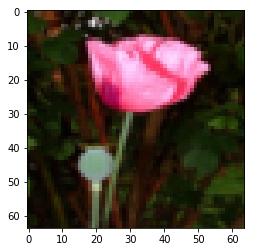

In [12]:
index = 30
plt.imshow(train_set_value[index])
print("标签为" + str(train_set_label[:,30]) + "，这是一个" + classes[np.squeeze(train_set_label[:, 30])].decode("utf-8") + "图片")

In [13]:
print("train_set_value" + str(train_set_value.shape))
print("train_set_label" + str(train_set_label.shape))
print("test_set_value" + str(test_set_value.shape))
print("test_set_label" + str(test_set_label.shape))

train_set_value(209, 64, 64, 3)
train_set_label(1, 209)
test_set_value(50, 64, 64, 3)
test_set_label(1, 50)


In [14]:
train_set_value_flatten = train_set_value.reshape(train_set_value.shape[0],-1).T
test_set_value_flatten = test_set_value.reshape(test_set_value.shape[0],-1).T
print("train_set_value_flatten sahpe:" + str(train_set_value_flatten.shape))
print("test_set_value_flatten sahpe:" + str(test_set_value_flatten.shape))

train_set_value_flatten sahpe:(12288, 209)
test_set_value_flatten sahpe:(12288, 50)


In [15]:
train_set_value = train_set_value_flatten/255.
test_set_value = test_set_value_flatten/255.
print(train_set_value)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


In [16]:
def sigmid(z):
    s = 1/(1+np.exp(-z))
    
    return s

In [17]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [18]:
w,b = initialize_with_zeros(12288)
print(w,'\n',b)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 
 0


In [20]:
X = train_set_value
print(X.shape[1])

209
